## Law of Large Numbers

According to the Law of Large Numbers, the average of $n$ of trials converges to the expected value of the measured variable when $n$ goes to infinity. Let us try such experiment.

In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

Last average: -0.4996847726795044


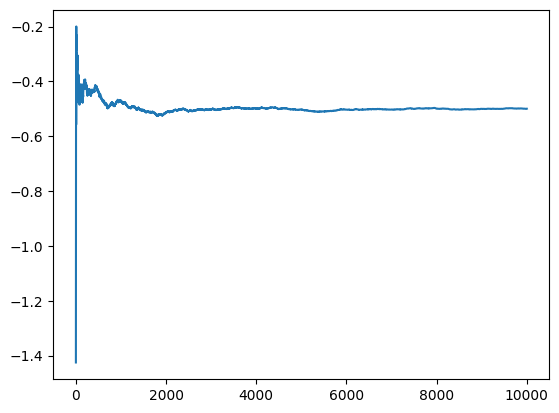

In [3]:
# for reproducibility
np.random.seed(1234)

N = 10000 + 1
samples = 3*np.random.rand(N) - 2
avgs = np.empty_like(samples)
for n in range(N):
    avgs[n] = samples[:n+1].mean()

plt.plot(np.arange(N),avgs) 
print("Last average:",avgs[-1])
plt.show()


## Central Limit Theorem

Informally, central limit theorem states that when independent random variables from the same probability distribution are added, their normalized sum tends towards a normal distribution. More formally:

Let $X_1,X_2,\ldots,X_n$ be random variables from a population with mean $\mu$ and finite variance $\sigma^2$, and let $\bar{X}_n=\frac{1}{n}\sum_{i=1}^n X_i$ be the sample mean. The limiting distribution for $$Z=\lim_{n\to \infty} \sqrt{n}\left(\frac{\bar{X}_n-\mu}{\sigma} \right)$$ is the standard normal distribution $\mathcal{N}(0,1)$.

Let $D$ be the uniform probability dostribution on the interval $\langle 3;5\rangle$. Let us generate a set $M$ of $n=1000$ samples from this distribution and plot its characteristic function.

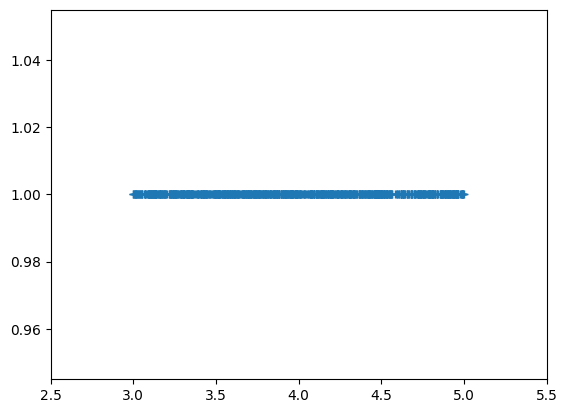

In [4]:
# here we intentionally use a newer infrastructure of numpy for random number generators
from numpy.random import default_rng
rg = default_rng(12345)

n = 1000;
lo_limit = 3;
hi_limit = 5;

M = rg.uniform(lo_limit, hi_limit, n)

fig = plt.figure()
plt.plot(M,np.ones_like(M),'+')
plt.xlim(lo_limit-0.5,hi_limit+0.5)
plt.show()

A better view of the sample is obtained from its histogram. Let us use 100 bins.

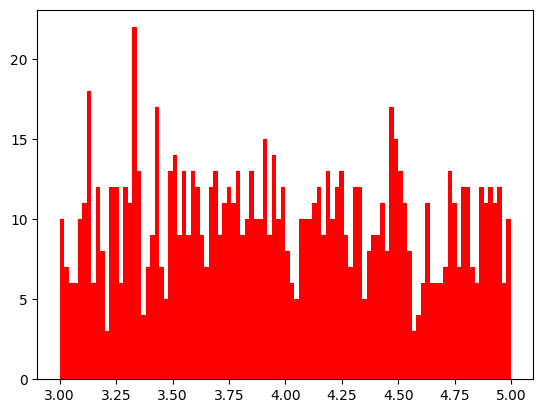

In [5]:
num_bins = 100
_ = plt.hist(M,bins=num_bins,color=(1.0,0,0))
plt.show()

The probability distribution $D$ has the expected value `mean_D` $ = 4$. Compute the standard deviation $\sigma$ of the distribution $D$ (you should compute it for the theoretical distribution) and store it in the variable `sigma_D`.

In [6]:
mean_D = 4.0
sigma_D = (5-3)/(12**(1/2))
print('Mean:',mean_D)
print('Sigma:',sigma_D)

Mean: 4.0
Sigma: 0.5773502691896258


The sample mean of `M` is

In [7]:
M_mean = M.mean()
print(f"Sample mean: {M_mean}")

Sample mean: 3.9835269955681976


The sample variance of `M` is

In [8]:
M_variance = M.var()
print(f"Sample variance: {M_variance}")

Sample variance: 0.3205972396489949


Sample standard deviation of `M` is

In [9]:
M_std = M.std()
print(f"Sample std: {M_std}")

Sample std: 0.566213069125921


Now we will generate `experiments=2000` sets of such samples

In [10]:
experiments = 2000
rg = default_rng(12345)

n = 3000;
lo_limit = 3;
hi_limit = 5;

M = rg.uniform(lo_limit,hi_limit,(experiments,n))

Let us animate the evolution of the historam of means of the samples (a sample is a row of the matrix `M`).

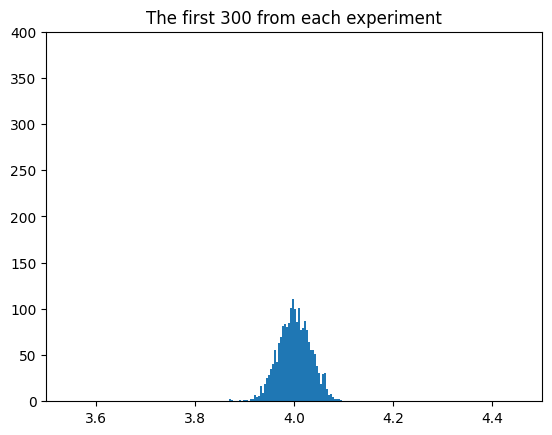

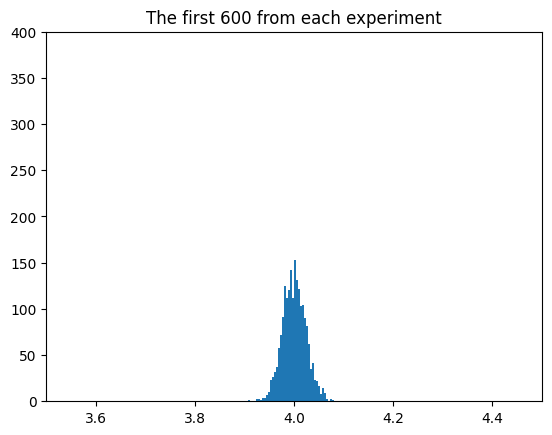

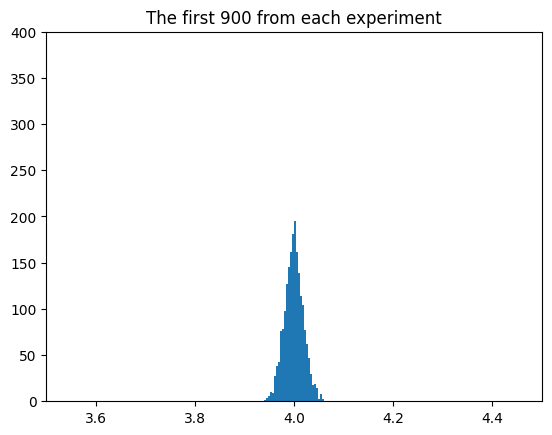

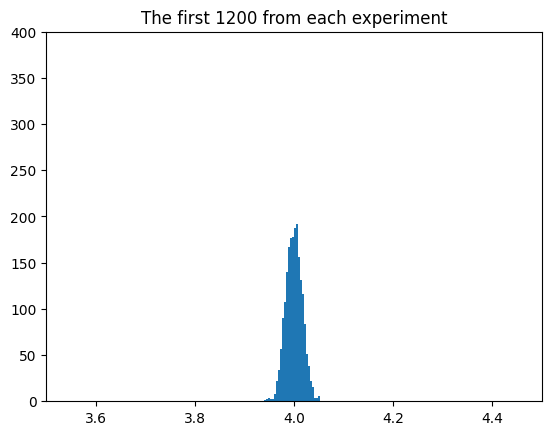

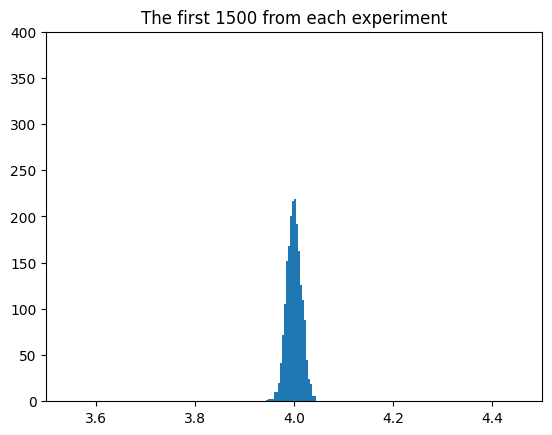

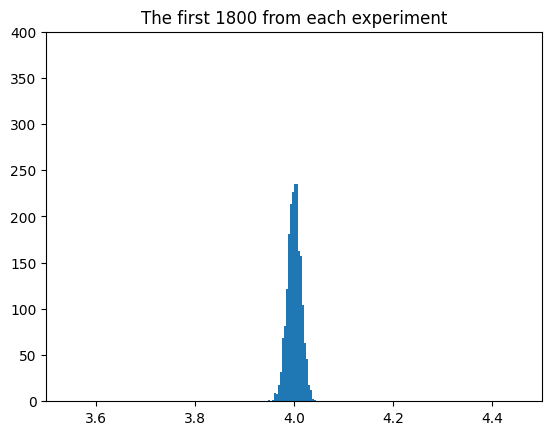

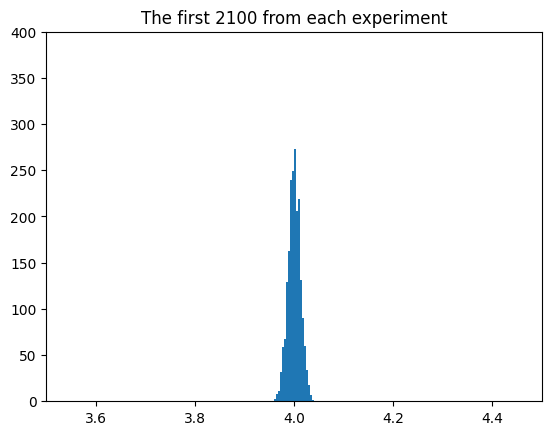

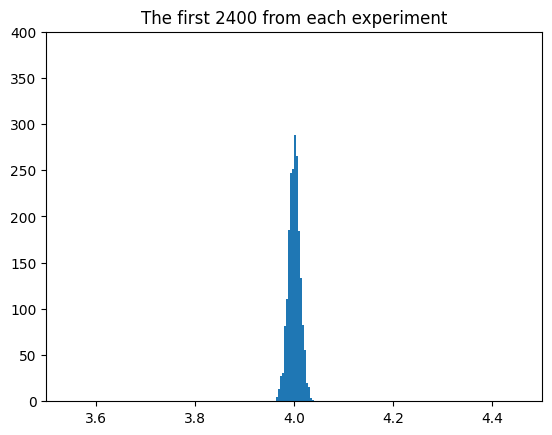

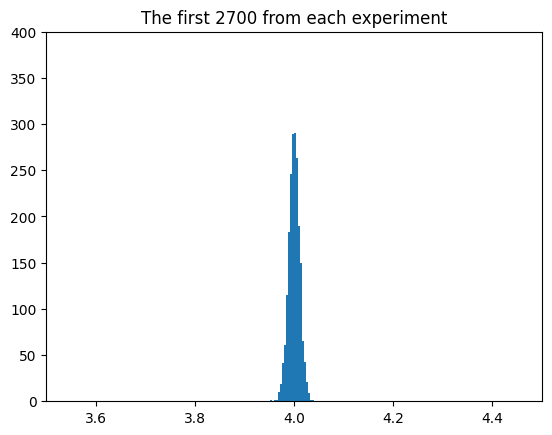

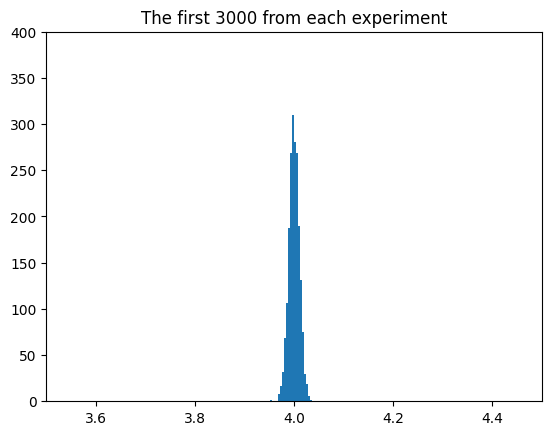

In [11]:
bins = np.linspace(3.8,4.2,num_bins+1)

frames = 10

for i in range(1,frames+1):
    fig = plt.figure()
    ax = plt.axes(xlim=(3.5,4.5), ylim=(0,400))
    mns = M[:,:int(i*n/frames)].mean(axis=1)
    ax.hist(mns, bins)
    plt.title(f"The first {int(i*n/frames)} from each experiment")
    plt.show()

Above we have seen:
> Let $X_1,X_2,\ldots,X_n$ be random variables from a population with mean $\mu$ and finite variance $\sigma^2$, and let $\bar{X}_n=\frac{1}{n}\sum_{i=1}^n X_i$ be the sample mean. The limiting distribution for $$Z=\lim_{n\to \infty} \sqrt{n}\left(\frac{\bar{X}_n-\mu}{\sigma} \right)$$ is the standard normal distribution $\mathcal{N}(0,1)$.

The central limit theorem has several formulations. One of them states that if $X_1,X_2,\ldots$ are independent random variables from the same probability ditribution with the expected value $\mu$ and a finite variance $\sigma^2$ then the distribution of the sample mean $\bar{X}_n = \frac{X_1+\cdots+X_n}{n}$ approaches normal distribution $$\mathcal{N}\left(\mu,\frac{\sigma}{\sqrt{n}}\right),$$ i.e., with the expected value $\mu$ and variance $\frac{\sigma^2}{n}$.

Let us increase the number samples $n$ in one experiment to 20000.

In [12]:
rg = default_rng(12345)

n = 20000;
M = rg.uniform(lo_limit,hi_limit,(experiments,n))

Plot the histogram of sample means for all rows of `M`.

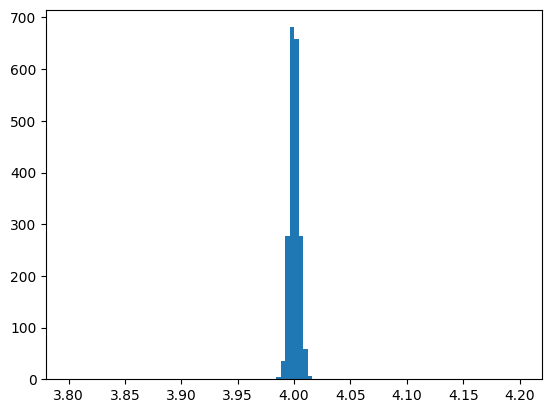

In [13]:
mns = M.mean(axis=1)
_ = plt.hist(mns,bins)
plt.show()

In order to interpret a histogram as a density function, we must ensure that the area under the curve is equal 1. This can be easily achieved when we divide the counts in each bin by (< width of a bin > $\cdot$ < total count >).

In [14]:
mns = M.mean(axis=1)
counts,edges = np.histogram(mns, bins)

Now we plot the approximation of the density function obtained from the histogram.

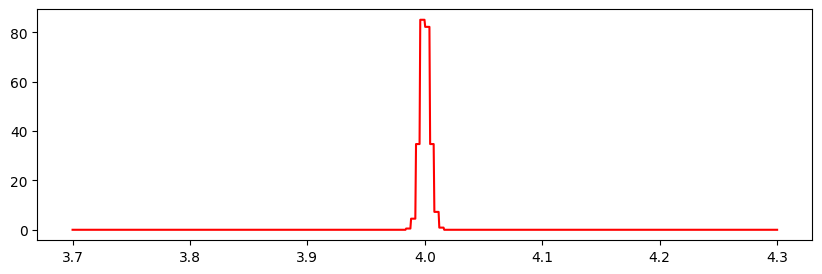

In [15]:
def histDE(x,counts,bins):
    # compute value of the density function obtained from histogram for all arguments in x
    # * arguments for which we compute the density function
    # * count is the number of hits in each bin
    # * bins are boundaries of the bins
    width = bins[1] - bins[0]
    hist = counts/np.sum(counts)/width
    y = np.empty_like(x)
    for i in range(x.shape[0]):
        if (x[i] < bins[0]) or (x[i] >= bins[-1]):
            y[i] = 0.0
        else:
            y[i] = hist[(x[i] < bins).argmax() - 1]
    return y

x = np.linspace(3.7,4.3,1000)
fig = plt.figure(figsize=(10,3))
plt.plot(x,histDE(x,counts,edges),'r')
plt.show()

Now we can add also the density of the normal distribution $$\mathcal{N}\left(\mu,\frac{\sigma}{\sqrt{n}}\right),$$ where $\sigma$ is the standard deviation of the distribution $D$.

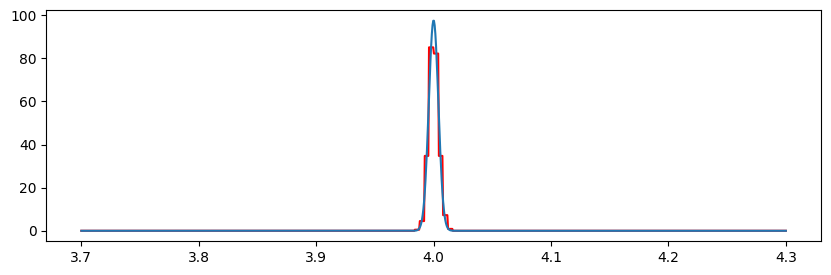

In [16]:
from scipy.stats import norm

# your code goes here
x = np.linspace(3.7,4.3,1000)
fig = plt.figure(figsize=(10,3))
plt.plot(x,histDE(x,counts,edges),'r') 
plt.plot(x,norm.pdf(x,mean_D,sigma_D/np.sqrt(n)))
plt.show()

Equivalently, when $n$ goes to infinity, $\sqrt{n}(\bar{X}_n - \mu)$ converges to the normal distribution with the expected value 0 and the variance $\sigma^2$.

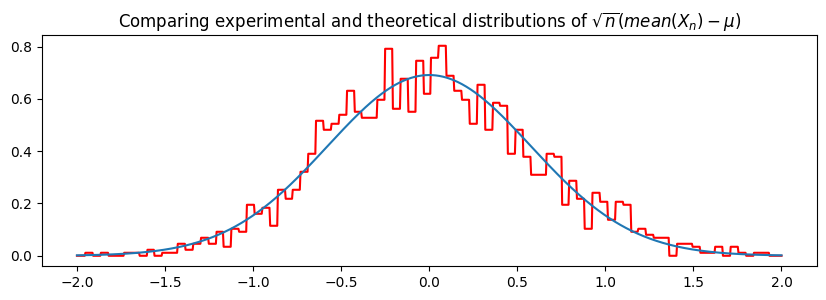

In [17]:
mns = M.mean(axis=1)
scaled_mns = np.sqrt(n)*(mns-mean_D)

counts,edges = np.histogram(scaled_mns, 100)

fig = plt.figure(figsize=(10,3))
x = np.linspace(-2,2,1000)
plt.plot(x,histDE(x,counts,edges),'r') 
# plot the corresponding theoretical density function
# YOUR CODE HERE
plt.plot(x,norm.pdf(x,0,sigma_D))
plt.title('Comparing experimental and theoretical distributions of $\sqrt{n}(mean(X_n) - \mu)$')
plt.show()

## Estimating Error

A stockbroker company BlueSky states that it has a stock price prediction algorithm $A$ capable of forecasting stock price based on the history of price for a given stock. The algorithm predicts whether the stock price will rise or decrease by at least 5% in one week. Before giving our money to BlueSky, we required it to test the algorithm. For evaluating the algorithm, we collected data for 300 stocks. We split the data into a training set $S$ comprising 250 stocks and testing set $T$ with the remaining 50 stocks. 

BlueSky trained the algorithm on the data from the training set. On the training set $S$ it predicted the development of the price for 200 stocks correctly and incorrectly for 50 stocks. On the test set $T$, the predictions of algorithm $A$ were correct 30 times and incorrect 20 times. 

Based on the above data, estimate the error rate of algorithm $A$ and compute a confidence interval that contains the algorithm's actual error rate with the probability of at least 95%.

The error rate of algorithm $A$ must be estiated on the test set that is independent from the train set. As there are two possible outcomes of the test, the error of the algorithm has Bernoulli probability ditribution with probability of an error $p \in \langle 0;1\rangle$. The value of the rerror we can estimate according to the number of errors on the test set.

In [18]:
size_T = 50;
errors_T = 20;
error_estimate = errors_T / size_T
print(f'Error estimate: {error_estimate}')

Error estimate: 0.4


### The Variance of the Error Estimate
The number of errors made by algortithm $A$ has a probability distribution of the sum of $n=$ `size_T` random variables from Bernoulli distribution $Bernoulli(p)$ for $p=$ `error_estimate` - this is the binomial distribution $Bi(n,p)$. The variance of the number of errors is 

In [19]:
var_num_errors = size_T * error_estimate * (1 - error_estimate)
var_num_errors

12.0

Hence the variance of the estimate of the error rate of the algorithm is 

In [20]:
var_of_error = error_estimate * (1 - error_estimate)
var_of_error

0.24

Plot the distribution function for the probability distribution for the **number** of errors. This is a discrete probability distribution - we will plot the probabilities for the number of errors between 0 and `size_T = 50`.

In [21]:
from scipy.stats import bernoulli, binom

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

Plot the cummulative density function for the number of errors.

In [ ]:
x = np.linspace(0,50,200)
plt.plot(x,binom.cdf(x, size_T, error_estimate))

What is the probability that the algorithm will make more than 10, 20 or 30 errors in a series of `size_T=50` tests?

What is the probability that the error of $A$ is higher than 30, 50, 60 or 90 percent?

For which value `nE` it holds that the probability algorithm $A$ makes more than `nE` errors is less than `alpha = 0.05, 0.01`?

In [ ]:
alpha = [0.05, 0.01]


###  Determining the Confidence Interval
For different values of confidence `alpha = [0.95, 0.99]` we have two possibilities:
* to find an interval $\langle 0; h \rangle$ such that the actual error rate of the algorithm $A$ belongs to the interval with probability `alpha`, or
* to find an interval $\langle d; h \rangle$ such that the actual error rate of the algorithm $A$ belongs to the interval with probability `alpha`, 
Compute both of them.

For which value `nE` it holds that the probability algorithm $A$ makes more than `nE` errors is less than `alfa = 0.05, 0.01`?

Having a sufficient number of trials, we can approximate the binomial distribution $Bi(n,p)$ by a normal distribution. Compute the above confidence intervals using the approximation.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9c17e1ac-b2cc-421e-8492-9f456eb1f406' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>